In [7]:
import numpy as np
import pandas as pd

In [8]:
title_basics_data = pd.read_csv("title_basics_data.tsv", delimiter = "\t", low_memory=False)
title_basics_data.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893,\N,1,"Comedy,Short"


In [9]:
title_ratings_data = pd.read_csv("title_ratings_data.tsv", delimiter = "\t")
title_ratings_data.head(5)

,tconst,averageRating,numVotes
0,tt0000001,5.6,1668
1,tt0000002,6.1,207
2,tt0000003,6.5,1389
3,tt0000004,6.2,123
4,tt0000005,6.2,2177


Find the average rank of the 10 most popular movies between 2000-2009 (inclusive)

In [10]:
title_basics_data['startYear'] = pd.to_numeric(title_basics_data['startYear'], errors='coerce')

In [11]:
year_updated_data = title_basics_data[(title_basics_data['startYear'] >= 2000) & (title_basics_data['startYear'] <= 2009) & (title_basics_data['titleType'] == "movie")]
year_updated_data.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
15184,tt0015414,movie,La tierra de los toros,La tierra de los toros,0.0,2000.0,\N,60,\N
34811,tt0035423,movie,Kate & Leopold,Kate & Leopold,0.0,2001.0,\N,118,"Comedy,Fantasy,Romance"
63462,tt0064730,movie,Japan Organized Crime Boss,Nihon boryoku-dan: Kumicho,0.0,2000.0,\N,97,"Action,Crime"
85714,tt0087608,movie,Leila wa al ziap,Leila wa al ziap,0.0,2008.0,\N,90,Documentary
86825,tt0088751,movie,The Naked Monster,The Naked Monster,0.0,2005.0,\N,100,"Comedy,Horror,Sci-Fi"
93967,tt0096056,movie,Crime and Punishment,Crime and Punishment,0.0,2002.0,\N,126,Drama
95409,tt0097540,movie,Responso,Responso,0.0,2004.0,\N,81,\N
100116,tt0102362,movie,Istota,Istota,0.0,2000.0,\N,80,"Drama,Romance"
105368,tt0107706,movie,Nothing,Nothing,0.0,2000.0,\N,\N,\N
106192,tt0108549,movie,West from North Goes South,West from North Goes South,0.0,2004.0,\N,96,"Comedy,Mystery"


In [12]:
merged_data = pd.merge(year_updated_data, title_ratings_data, on='tconst')
merged_data.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0015414,movie,La tierra de los toros,La tierra de los toros,0.0,2000.0,\N,60,\N,5.4,11
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,0.0,2001.0,\N,118,"Comedy,Fantasy,Romance",6.4,78627
2,tt0064730,movie,Japan Organized Crime Boss,Nihon boryoku-dan: Kumicho,0.0,2000.0,\N,97,"Action,Crime",7.0,172
3,tt0087608,movie,Leila wa al ziap,Leila wa al ziap,0.0,2008.0,\N,90,Documentary,7.7,13
4,tt0088751,movie,The Naked Monster,The Naked Monster,0.0,2005.0,\N,100,"Comedy,Horror,Sci-Fi",5.4,273
5,tt0096056,movie,Crime and Punishment,Crime and Punishment,0.0,2002.0,\N,126,Drama,5.8,640
6,tt0097540,movie,Responso,Responso,0.0,2004.0,\N,81,\N,7.4,5
7,tt0102362,movie,Istota,Istota,0.0,2000.0,\N,80,"Drama,Romance",4.8,10
8,tt0108549,movie,West from North Goes South,West from North Goes South,0.0,2004.0,\N,96,"Comedy,Mystery",7.7,23
9,tt0109173,movie,Auf allen Meeren,Auf allen Meeren,0.0,2002.0,\N,95,Documentary,7.8,26


In [13]:
popular_movies_data =  merged_data.sort_values('numVotes', ascending = False)
popular_movies_data.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
19849,tt0468569,movie,The Dark Knight,The Dark Knight,0.0,2008.0,\N,152,"Action,Crime,Drama",9.0,2282922
64,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0.0,2001.0,\N,178,"Action,Adventure,Drama",8.8,1645568
349,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0.0,2003.0,\N,201,"Action,Adventure,Drama",8.9,1629102
350,tt0167261,movie,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Two Towers,0.0,2002.0,\N,179,"Action,Adventure,Drama",8.7,1472768
400,tt0172495,movie,Gladiator,Gladiator,0.0,2000.0,\N,155,"Action,Adventure,Drama",8.5,1330015
11558,tt0372784,movie,Batman Begins,Batman Begins,0.0,2005.0,\N,140,"Action,Adventure",8.2,1298154
10546,tt0361748,movie,Inglourious Basterds,Inglourious Basterds,0.0,2009.0,\N,153,"Adventure,Drama,War",8.3,1254451
14548,tt0407887,movie,The Departed,The Departed,0.0,2006.0,\N,151,"Crime,Drama,Thriller",8.5,1179166
21233,tt0482571,movie,The Prestige,The Prestige,0.0,2006.0,\N,130,"Drama,Mystery,Sci-Fi",8.5,1178601
1020,tt0209144,movie,Memento,Memento,0.0,2000.0,\N,113,"Mystery,Thriller",8.4,1117084


In [14]:
popular_movies_data.head(10)['averageRating'].mean()

8.580000000000002

Find the year in the 1900s when the average rank increased the most, compared to the previous year.(Ignore movies with votes < 1000)

In [15]:
votes_data = title_ratings_data[title_ratings_data['numVotes'] >= 1000]
votes_data.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.6,1668
2,tt0000003,6.5,1389
4,tt0000005,6.2,2177
7,tt0000008,5.4,1840
9,tt0000010,6.9,6137
11,tt0000012,7.4,10527
12,tt0000013,5.7,1596
13,tt0000014,7.1,4700
15,tt0000016,5.9,1217
21,tt0000023,5.7,1163


In [16]:
merged_data_updated = pd.merge(title_basics_data, votes_data, on = 'tconst')
merged_data_updated.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,\N,1,"Documentary,Short",5.6,1668
1,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,\N,4,"Animation,Comedy,Romance",6.5,1389
2,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,\N,1,"Comedy,Short",6.2,2177
3,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0.0,1894.0,\N,1,"Documentary,Short",5.4,1840
4,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0.0,1895.0,\N,1,"Documentary,Short",6.9,6137
5,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896.0,\N,1,"Documentary,Short",7.4,10527
6,tt0000013,short,The Photographical Congress Arrives in Lyon,Neuville-sur-Saône: Débarquement du congrès de...,0.0,1895.0,\N,1,"Documentary,Short",5.7,1596
7,tt0000014,short,The Waterer Watered,L'arroseur arrosé,0.0,1895.0,\N,1,"Comedy,Short",7.1,4700
8,tt0000016,short,Barque sortant du port,Barque sortant du port,0.0,1895.0,\N,1,"Documentary,Short",5.9,1217
9,tt0000023,short,The Sea,Baignade en mer,0.0,1895.0,\N,1,"Documentary,Short",5.7,1163


In [17]:
year_data_updated = merged_data_updated[(merged_data_updated['startYear'] >= 1900) & (merged_data_updated['startYear'] < 2000) & (merged_data_updated['titleType'] == "movie")]
year_data_updated.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
41,tt0002130,movie,Dante's Inferno,L'Inferno,0.0,1911.0,\N,71,"Adventure,Drama,Fantasy",7.0,2323
45,tt0002844,movie,Fantômas: In the Shadow of the Guillotine,Fantômas - À l'ombre de la guillotine,0.0,1913.0,\N,54,"Crime,Drama",7.0,1970
46,tt0003037,movie,Fantomas: The Man in Black,Juve contre Fantômas,0.0,1913.0,\N,61,"Crime,Drama",7.0,1365
47,tt0003165,movie,Fantômas: The Dead Man Who Killed,Le mort qui tue,0.0,1913.0,\N,90,"Crime,Drama,Mystery",7.0,1066
48,tt0003419,movie,The Student of Prague,Der Student von Prag,0.0,1913.0,\N,85,"Drama,Fantasy,Horror",6.5,1818
50,tt0003643,movie,The Avenging Conscience: or 'Thou Shalt Not Kill',The Avenging Conscience: or 'Thou Shalt Not Kill',0.0,1914.0,\N,78,"Crime,Drama,Horror",6.4,1133
52,tt0003740,movie,Cabiria,Cabiria,0.0,1914.0,\N,148,"Adventure,Drama,History",7.1,3142
55,tt0003930,movie,Fantomas: The Mysterious Finger Print,Fantômas contre Fantômas,0.0,1914.0,\N,59,"Crime,Drama",6.9,1174
58,tt0004026,movie,The Golem,Der Golem,0.0,1915.0,\N,60,Horror,6.8,1051
60,tt0004181,movie,Judith of Bethulia,Judith of Bethulia,0.0,1914.0,\N,61,Drama,6.1,1250


In [18]:
year_data_updated.tail(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
27140,tt0827739,movie,Sev Kardesim,Sev Kardesim,0.0,1972.0,\N,86,"Comedy,Romance",6.7,1466
28056,tt0926208,movie,The Double Lottie,Khaharan-e gharib,0.0,1996.0,\N,93,"Drama,Family,Musical",6.6,1420
28087,tt0930098,movie,Yilanlarin Öcü,Yilanlarin Öcü,0.0,1985.0,\N,98,Drama,7.6,1201
28089,tt0930902,movie,Midori,Shôjo tsubaki: Chika gentô gekiga,0.0,1992.0,\N,56,"Animation,Drama,Horror",6.7,1691
28235,tt0954005,movie,Sevimli Hirsiz,Sevimli Hirsiz,0.0,1988.0,\N,86,Comedy,6.4,1440
28343,tt0965649,movie,Detective Conan: The Fourteenth Target,Meitantei Conan: 14 banme no target,0.0,1998.0,\N,99,"Adventure,Animation,Crime",7.4,1993
28420,tt0976030,movie,Delisin,Delisin,0.0,1975.0,\N,75,"Comedy,Romance",6.9,2043
28504,tt0984177,movie,Amarkalam,Amarkalam,0.0,1999.0,\N,148,"Action,Drama,Romance",7.3,1412
28555,tt0989831,movie,Jibon Theke Neya,Jibon Theke Neya,0.0,1970.0,\N,150,"Drama,Family,War",9.3,1833
28782,tt1003080,movie,The Green Elephant,Zelyonyy slonik,0.0,1999.0,\N,90,"Drama,Horror,Thriller",5.5,2117


In [19]:
result = year_data_updated.groupby('startYear').agg(values = ('averageRating', np.mean)).reset_index()
result

,startYear,values
0,1911.0,7.000000
1,1913.0,6.875000
2,1914.0,6.560000
3,1915.0,6.760000
4,1916.0,6.950000
...,...,...
83,1995.0,6.413867
84,1996.0,6.320000
85,1997.0,6.416247
86,1998.0,6.420267


In [20]:
maximum = 0
final_year = 0
for i in range(1, len(result)):
    x = result.loc[i, 'values']
    y = result.loc[i-1, 'values']
    temp = abs(x - y)
    if (temp > maximum):
        maximum = temp
        final_year = result.loc[[i], ['startYear']]
final_year

,startYear
17,1929.0


Find the expected average rank for 2013 using linear regression. How good is this regression? 
(Ignore movies with votes < 1000.)

In [21]:
merged_data_updated.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,\N,1,"Documentary,Short",5.6,1668
1,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,\N,4,"Animation,Comedy,Romance",6.5,1389
2,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,\N,1,"Comedy,Short",6.2,2177
3,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0.0,1894.0,\N,1,"Documentary,Short",5.4,1840
4,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0.0,1895.0,\N,1,"Documentary,Short",6.9,6137
5,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896.0,\N,1,"Documentary,Short",7.4,10527
6,tt0000013,short,The Photographical Congress Arrives in Lyon,Neuville-sur-Saône: Débarquement du congrès de...,0.0,1895.0,\N,1,"Documentary,Short",5.7,1596
7,tt0000014,short,The Waterer Watered,L'arroseur arrosé,0.0,1895.0,\N,1,"Comedy,Short",7.1,4700
8,tt0000016,short,Barque sortant du port,Barque sortant du port,0.0,1895.0,\N,1,"Documentary,Short",5.9,1217
9,tt0000023,short,The Sea,Baignade en mer,0.0,1895.0,\N,1,"Documentary,Short",5.7,1163


In [22]:
movies_data = merged_data_updated[merged_data_updated['titleType'] == "movie"]
movies_data

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
41,tt0002130,movie,Dante's Inferno,L'Inferno,0.0,1911.0,\N,71,"Adventure,Drama,Fantasy",7.0,2323
45,tt0002844,movie,Fantômas: In the Shadow of the Guillotine,Fantômas - À l'ombre de la guillotine,0.0,1913.0,\N,54,"Crime,Drama",7.0,1970
46,tt0003037,movie,Fantomas: The Man in Black,Juve contre Fantômas,0.0,1913.0,\N,61,"Crime,Drama",7.0,1365
47,tt0003165,movie,Fantômas: The Dead Man Who Killed,Le mort qui tue,0.0,1913.0,\N,90,"Crime,Drama,Mystery",7.0,1066
48,tt0003419,movie,The Student of Prague,Der Student von Prag,0.0,1913.0,\N,85,"Drama,Fantasy,Horror",6.5,1818
...,...,...,...,...,...,...,...,...,...,...,...
28839,tt1006926,movie,One Piece: Dead End Adventure,One piece: Dead end no bôken,0.0,2003.0,\N,95,"Action,Adventure,Animation",7.3,1500
28842,tt1007018,movie,The Open Road,The Open Road,0.0,2009.0,\N,90,"Comedy,Drama",5.4,3382
28843,tt1007028,movie,Zack and Miri Make a Porno,Zack and Miri Make a Porno,0.0,2008.0,\N,101,"Comedy,Romance",6.5,171604
28844,tt1007029,movie,The Iron Lady,The Iron Lady,0.0,2011.0,\N,105,"Biography,Drama",6.4,102776


In [23]:
each_year_data = movies_data.groupby('startYear').agg(avg = ('averageRating', np.mean)).reset_index()
each_year_data

,startYear,avg
0,1911.0,7.000000
1,1913.0,6.875000
2,1914.0,6.560000
3,1915.0,6.760000
4,1916.0,6.950000
...,...,...
104,2016.0,6.015385
105,2017.0,5.933333
106,2018.0,6.271429
107,2019.0,6.658824


In [24]:
each_year_data.tail(10)

,startYear,avg
99,2011.0,6.061702
100,2012.0,6.150000
101,2013.0,6.178261
102,2014.0,6.470000
103,2015.0,6.762500
104,2016.0,6.015385
105,2017.0,5.933333
106,2018.0,6.271429
107,2019.0,6.658824
108,2020.0,5.690000


In [25]:
each_year_data = each_year_data[each_year_data['startYear'] != 2013]
each_year_data.tail(10)

,startYear,avg
98,2010.0,6.155263
99,2011.0,6.061702
100,2012.0,6.150000
102,2014.0,6.470000
103,2015.0,6.762500
104,2016.0,6.015385
105,2017.0,5.933333
106,2018.0,6.271429
107,2019.0,6.658824
108,2020.0,5.690000


In [26]:
from sklearn.linear_model import LinearRegression
x = each_year_data['startYear'].values.reshape(-1,1)
y = each_year_data['avg'].values.reshape(-1,1)

model = LinearRegression().fit(x,y)

xtest = np.array([2013]).reshape(-1,1)
y_pred = model.predict(xtest)
y_pred

array([[6.23616685]])

Find the correlation between rank and votes for each year in the 1900s. 
By how much did the correlation coefficient grow each year? How good is this regression?

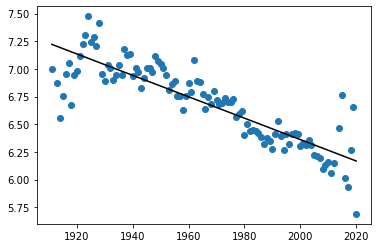

In [28]:
# Visualization
import matplotlib.pyplot as plt
pred2 = model.predict(x)
plt.scatter(x, y)
plt.plot(x, pred2, color='black')
plt.show()

In [29]:
year_data_updated1 = title_basics_data[(title_basics_data['startYear']>= 1900) & (title_basics_data['startYear'] < 2000) & (title_basics_data['titleType'] == "movie")]
year_data_updated1.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
331,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0.0,1900.0,\N,\N,"Biography,Drama"
498,tt0000502,movie,Bohemios,Bohemios,0.0,1905.0,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0.0,1906.0,\N,70,"Biography,Crime,Drama"
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0.0,1907.0,\N,\N,Drama
625,tt0000630,movie,Hamlet,Amleto,0.0,1908.0,\N,\N,Drama
668,tt0000675,movie,Don Quijote,Don Quijote,0.0,1908.0,\N,\N,Drama
669,tt0000676,movie,Don Álvaro o la fuerza del sino,Don Álvaro o la fuerza del sino,0.0,1908.0,\N,\N,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0.0,1908.0,\N,120,"Adventure,Fantasy"
729,tt0000739,movie,El pastorcito de Torrente,El pastorcito de Torrente,0.0,1908.0,\N,\N,Drama
783,tt0000793,movie,Andreas Hofer,Andreas Hofer,0.0,1909.0,\N,\N,Drama


In [30]:
merge_data = pd.merge(title_ratings_data, year_data_updated1, on = 'tconst')
merge_data.head(10)

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000335,6.0,39,movie,Soldiers of the Cross,Soldiers of the Cross,0.0,1900.0,\N,\N,"Biography,Drama"
1,tt0000502,4.5,8,movie,Bohemios,Bohemios,0.0,1905.0,\N,100,\N
2,tt0000574,6.1,607,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0.0,1906.0,\N,70,"Biography,Crime,Drama"
3,tt0000615,4.5,14,movie,Robbery Under Arms,Robbery Under Arms,0.0,1907.0,\N,\N,Drama
4,tt0000630,3.2,11,movie,Hamlet,Amleto,0.0,1908.0,\N,\N,Drama
5,tt0000675,4.9,9,movie,Don Quijote,Don Quijote,0.0,1908.0,\N,\N,Drama
6,tt0000676,4.4,8,movie,Don Álvaro o la fuerza del sino,Don Álvaro o la fuerza del sino,0.0,1908.0,\N,\N,Drama
7,tt0000679,5.2,35,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0.0,1908.0,\N,120,"Adventure,Fantasy"
8,tt0000739,6.3,7,movie,El pastorcito de Torrente,El pastorcito de Torrente,0.0,1908.0,\N,\N,Drama
9,tt0000793,5.0,7,movie,Andreas Hofer,Andreas Hofer,0.0,1909.0,\N,\N,Drama


In [31]:
years = list(merge_data['startYear'].unique())
year_corr = pd.DataFrame()
for year in years:
    X = merge_data[merge_data['startYear']==year].iloc[:,[1,2]]
    corr = X.corr()
    corr = corr['averageRating'][1]
    newRow = {'Correlation':corr,'Year':year}
    year_corr = year_corr.append(newRow, ignore_index=True)
year_corr = year_corr.reindex(columns=['Year', 'Correlation'])
year_corr

,Year,Correlation
0,1900.0,-0.125472
1,1905.0,0.233893
2,1906.0,0.910185
3,1907.0,0.050101
4,1908.0,-0.024057
...,...,...
95,1997.0,0.112500
96,1903.0,0.742293
97,1902.0,-0.316438
98,1904.0,0.654790


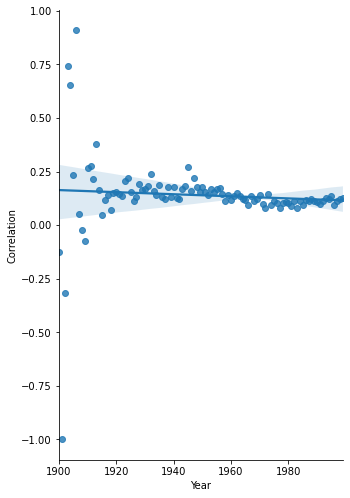

In [35]:
import seaborn as sns
sns.pairplot(year_corr, x_vars='Year', y_vars='Correlation', height=7, aspect=0.7, kind='reg')